In [2]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder=LabelEncoder()
data['species']=encoder.fit_transform(data['species'])

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
data=data[['sepal_length','petal_width','species']]
data

,sepal_length,petal_width,species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0
...,...,...,...
145,6.7,2.3,2
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


In [14]:
x=data.iloc[:,0:2]
y=data.iloc[:,-1]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [19]:
model=LogisticRegression(multi_class="multinomial")

In [21]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [26]:
x_pred=model.predict(x_test)

In [29]:
accuracy_score(y_test,x_pred)

0.9333333333333333

In [31]:
confusion_matrix(y_test,x_pred)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]], dtype=int64)

In [33]:
model.predict_proba(x_test)

array([[7.53359649e-01, 2.45008491e-01, 1.63185977e-03],
       [3.36157764e-01, 6.00760290e-01, 6.30819463e-02],
       [1.37993447e-02, 6.20256871e-01, 3.65943784e-01],
       [7.51830507e-01, 2.45476399e-01, 2.69309337e-03],
       [5.04414823e-05, 1.05902465e-01, 8.94047093e-01],
       [9.33224843e-03, 4.90886756e-01, 4.99780995e-01],
       [5.52720544e-05, 6.32276207e-02, 9.36717107e-01],
       [8.27736512e-01, 1.70635452e-01, 1.62803575e-03],
       [9.42967078e-01, 5.68061832e-02, 2.26738354e-04],
       [5.52720544e-05, 6.32276207e-02, 9.36717107e-01],
       [9.99682767e-02, 7.12638424e-01, 1.87393299e-01],
       [7.51830507e-01, 2.45476399e-01, 2.69309337e-03],
       [1.29676151e-04, 1.08744815e-01, 8.91125509e-01],
       [1.24783132e-02, 5.61984727e-01, 4.25536960e-01],
       [2.45534933e-02, 5.98960790e-01, 3.76485717e-01],
       [9.63235894e-01, 3.66369315e-02, 1.27174920e-04],
       [1.04467982e-01, 7.43249670e-01, 1.52282348e-01],
       [4.73770051e-02, 6.25992

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'petal_width')

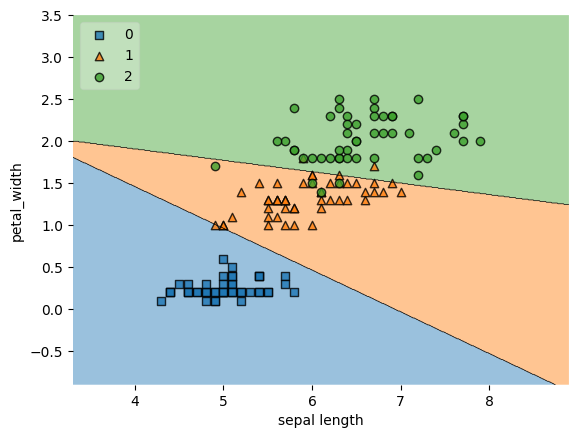

In [39]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,model,legend=2)
plt.xlabel("sepal length")
plt.ylabel("petal_width")
